### Instrucciones
1. Sin utilizar las bibliotecas de *scikit-learn* para regresión lineal, elabora un programa en Python que implemente **BGD monovariable sin sesgo**.

### Entrada
- Archivo `casas.csv`
- Número de iteraciones
- Peso inicial
- Valor de α (learning rate)

### Procedimiento
- Divide `casas.csv` en:
  - 70% para entrenamiento
  - 30% para pruebas  
  Usando los parámetros:  
  `shuffle=True` y `random_state=0`.

### Salida
(Ver ejemplo de la **Figura 1**)

- Peso en cada iteración calculado con el conjunto de entrenamiento.
- Valores `y_test`.
- Valores `y_pred` en cada iteración.
- Error de estimación:  

  $
  \sigma = \sum_{i=1}^{n} (y_{pred_i} - y_{test_i})
  $

- **Gráfica 1**
  - Distribución de los datos de prueba
  - Valores `y_pred` en cada iteración
- **Gráfica 2**
  - Error de estimación de cada iteración

In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

$$Y = XW$$

In [ ]:
def predict(X, weights):
    return X.dot(weights)

  $$
  \sigma = \sum_{i=1}^{n} (y_{pred_i} - y_{test_i})
  $$

In [259]:
def error(y_true, y_pred):
    """Mean squared error"""
    return sum(y_pred - y_true)

$$ \frac{\partial \sigma}{\partial w} = (w \times X - Y) \cdot X$$

In [260]:
def gradient(index, W, X, Y):
    print(X.T[index])
    print(W[index])
    print(Y)
    Y_pred = W[index] * X.T[index]  # Predicción
    return np.dot((Y_pred - Y), X.T[index])  # Gradiente

$$\Delta w = -2 \times \frac{\partial \sigma}{\partial w} \times \alpha$$

In [261]:
def increment(index, W, X, Y, alpha):
    grad = gradient(index, W, X, Y)
    return - 2 * alpha * grad

$$w = w + \Delta w$$

In [262]:
def update_weights(W, X, Y, alpha):
    for i in range(len(W)):
        W[i] += increment(i, W, X, Y, alpha)

In [ ]:
def batch_gradient_descent(X, Y, initial_weight, learning_rate=0.01, n_iterations=1000):
    """BGD monovariable sin sesgo"""
    W = np.array([initial_weight])  # Peso inicial
    
    # Listas para almacenar historiales
    weights_history = []
    errors_history = []
    
    for iteration in range(n_iterations):
        update_weights(W, X, Y, learning_rate)
        
        # Guardar peso actual
        weights_history.append(W[0])
        
        # Calcular predicción y error
        Y_pred = predict(X, W)
        print("Y_pred: ", Y_pred)
        current_error = error(Y, Y_pred)
        errors_history.append(current_error)
        
    return W, weights_history, errors_history

[468. 616. 594. 625. 963. 440. 255.]
0.0
[1.08 1.42 1.37 1.44 2.21 1.01 0.59]
[468. 616. 594. 625. 963. 440. 255.]
0.0011634039999999998
[1.08 1.42 1.37 1.44 2.21 1.01 0.59]
[468. 616. 594. 625. 963. 440. 255.]
0.0017386060618519998
[1.08 1.42 1.37 1.44 2.21 1.01 0.59]
[468. 616. 594. 625. 963. 440. 255.]
0.002022993438858433
[1.08 1.42 1.37 1.44 2.21 1.01 0.59]
[468. 616. 594. 625. 963. 440. 255.]
0.0021635982550863146
[1.08 1.42 1.37 1.44 2.21 1.01 0.59]
[468. 616. 594. 625. 963. 440. 255.]
0.00223311510409199
[1.08 1.42 1.37 1.44 2.21 1.01 0.59]
[468. 616. 594. 625. 963. 440. 255.]
0.002267485137959433
[1.08 1.42 1.37 1.44 2.21 1.01 0.59]
[468. 616. 594. 625. 963. 440. 255.]
0.0022844781295139373
[1.08 1.42 1.37 1.44 2.21 1.01 0.59]
[468. 616. 594. 625. 963. 440. 255.]
0.0022928796854473745
[1.08 1.42 1.37 1.44 2.21 1.01 0.59]

=== RESULTADOS FINALES ===
Peso final: 0.002297

Primeros 10 valores de y_test: [0.88 1.63 0.99]
Primeros 10 valores de y_pred: [0.87516977 1.62629973 0.9900

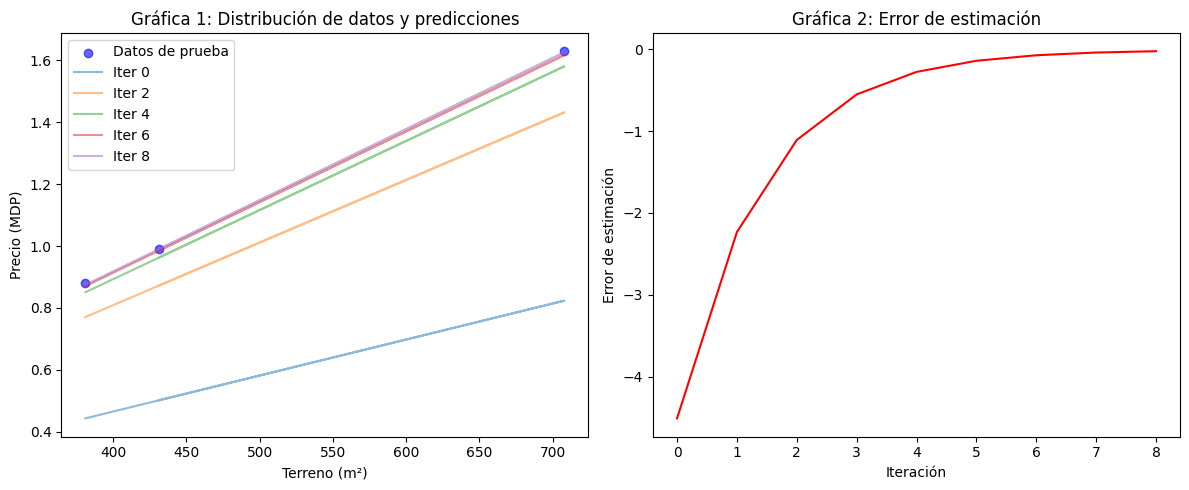

In [264]:
dataset = pd.read_csv('casas.csv')
initial_weight = 0.0  # Peso inicial
learning_rate = 0.0000001
n_iterations = 9

# División de datos
X_train, X_test, Y_train, Y_test = train_test_split(
    dataset.iloc[:, :-1], 
    dataset.iloc[:, -1], 
    test_size=0.3, 
    shuffle=True, 
    random_state=0
)

# Entrenamiento
best_weights, weights_history, errors_history = batch_gradient_descent(
    X_train.values,
    Y_train.values, 
    initial_weight,
    learning_rate, 
    n_iterations
)

# Predicción en test
Y_pred = predict(X_test.values.reshape(-1, 1), best_weights)

# Mostrar resultados
print("\n=== RESULTADOS FINALES ===")
print(f"Peso final: {best_weights[0]:.6f}")
print(f"\nPrimeros 10 valores de y_test: {Y_test.values}")
print(f"Primeros 10 valores de y_pred: {Y_pred}")
print(f"Error total en test: {error(Y_test.values, Y_pred):.6f}")

# GRÁFICA 1: Datos de prueba + predicciones por iteración
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_test, Y_test, color='blue', label='Datos de prueba', alpha=0.6)
for i in [0, n_iterations//4, n_iterations//2, 3*n_iterations//4, n_iterations-1]:
    Y_pred_iter = X_test.values.reshape(-1, 1) * weights_history[i]
    plt.plot(X_test, Y_pred_iter, alpha=0.5, label=f'Iter {i}')
plt.xlabel('Terreno (m²)')
plt.ylabel('Precio (MDP)')
plt.title('Gráfica 1: Distribución de datos y predicciones')
plt.legend()

# GRÁFICA 2: Error vs iteración
plt.subplot(1, 2, 2)
plt.plot(range(n_iterations), errors_history, color='red')
plt.xlabel('Iteración')
plt.ylabel('Error de estimación')
plt.title('Gráfica 2: Error de estimación')
plt.tight_layout()
plt.show()